In [2]:
from fastai.tabular import *

import pandas as pd
import numpy as np

import glob

In [3]:
df = pd.concat([pd.read_csv(f, encoding='latin1') for f in glob.glob('../data/v4/*.csv')])

In [4]:
df.head()

,origin_day,origin_hour,origin_day_sin,origin_day_cos,origin_hour_sin,origin_hour_cos,origin_density_cluster,origin_speed_cluster,origin_distance_from_density_center,origin_bearing_from_density_center,...,origin_distance_from_speed_center_squared,dest_distance_from_density_center_squared,dest_distance_from_speed_center_squared,distance_origin_dest_squared,distance_origin_dest_density_cluster_squared,distance_origin_dest_speed_cluster_squared,day_hour_crossing,origin_dest_density_cluster_crossing,origin_dest_speed_cluster_crossing,duration
0,3,9,0.9749,0.2225,0.9239,0.3827,12,16,1.0846,-174.3222,...,5.6027,2.1880,6.0128,369.5314,344.2287,322.8346,81,243,339,2130
1,4,11,0.9749,-0.2225,0.9914,0.1305,3,15,2.1962,112.9280,...,3.5547,0.7585,7.3100,230.9367,198.0916,205.6585,107,76,308,900
2,0,2,0.0000,1.0000,0.2588,0.9659,4,10,1.6362,2.8973,...,1.2735,0.3941,2.7278,109.4304,128.2534,99.2036,2,91,206,977
3,2,22,0.7818,0.6235,0.2588,-0.9659,3,19,0.8167,-167.5233,...,3.9295,7.0405,5.8443,104.5016,125.6125,81.9966,70,61,391,935
4,6,22,0.4339,-0.9010,0.2588,-0.9659,13,0,0.8750,-44.0458,...,9.5883,1.6569,0.2905,204.1955,196.4034,254.5333,166,271,6,1477


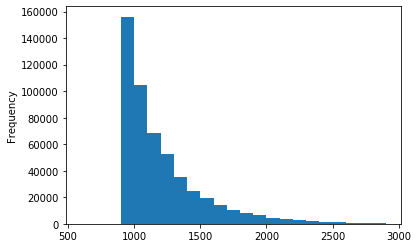

In [5]:
df.duration.plot.hist(bins=np.arange(600, 3000, 100))

In [6]:
filter_df = pd.concat([pd.read_csv(f, encoding='latin1') for f in glob.glob('../data/v3/*.csv')])

In [7]:
filter_df = filter_df[(filter_df.duration < 900) & (filter_df.duration > 600)]

In [8]:
filter_df = filter_df[np.random.random(filter_df.shape[0]) > 0.90]

In [9]:
df = pd.concat([df, filter_df])

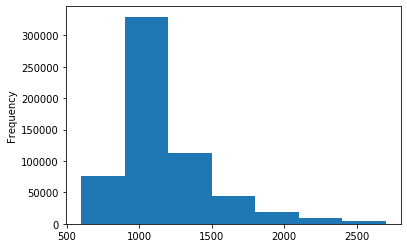

In [10]:
df.duration.plot.hist(bins=np.arange(600, 3000, 300))

In [11]:
oversampling = df[df.duration > 1300]

In [12]:
df = pd.concat([oversampling, df])

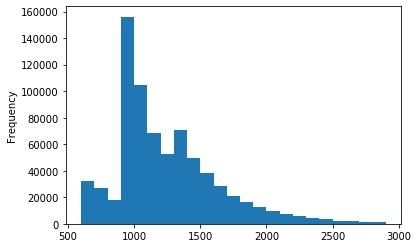

In [13]:
df.duration.plot.hist(bins=np.arange(600, 3000, 100))

In [47]:
df.duration = df.duration.astype('float32')

In [48]:
cont_names = [
    'origin_day_sin', 'origin_day_cos', 'origin_hour_sin', 'origin_hour_cos',
    'origin_distance_from_density_center', 'origin_bearing_from_density_center',
    'origin_distance_from_speed_center', 'origin_bearing_from_speed_center',
    'dest_distance_from_density_center', 'dest_bearing_from_density_center',
    'dest_distance_from_speed_center', 'dest_bearing_from_speed_center',
    'distance_origin_dest', 'bearing_origin_dest',
    'distance_origin_dest_density_cluster', 'distance_origin_dest_speed_cluster',
    'origin_distance_from_density_center_squared', 'origin_distance_from_speed_center_squared',
    'dest_distance_from_density_center_squared', 'dest_distance_from_speed_center_squared',
    'distance_origin_dest_squared', 
    'distance_origin_dest_density_cluster_squared', 'distance_origin_dest_speed_cluster_squared',
]
cat_names = [
    "origin_day", "origin_hour",
    "origin_density_cluster", "origin_speed_cluster",
    "dest_density_cluster", "dest_speed_cluster",
    "day_hour_crossing", "origin_dest_density_cluster_crossing", "origin_dest_speed_cluster_crossing"
]
dep_var = 'duration'

In [49]:
procs = [Categorify, Normalize]

In [50]:
np.random.seed(2020)
valids = np.random.random(df.shape[0])

In [51]:
valid_idx = df[valids > 0.9].index

In [58]:
data = TabularDataBunch.from_df(
    '../models', df, dep_var, valid_idx=valid_idx, procs=procs, 
    cat_names=cat_names, cont_names=cont_names
)

In [59]:
learn = tabular_learner(
    data, layers=[512, 256, 64], ps=[0.4, 0.4, 0.4], metrics=root_mean_squared_error
)

In [60]:
learn.lr_find()

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


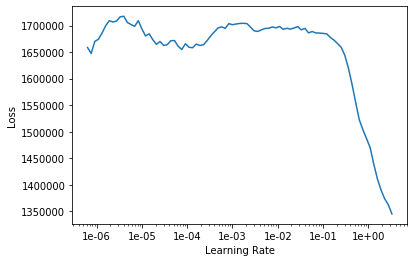

In [61]:
learn.recorder.plot()

In [62]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(8, 5)
    (1): Embedding(25, 10)
    (2): Embedding(21, 9)
    (3): Embedding(21, 9)
    (4): Embedding(21, 9)
    (5): Embedding(21, 9)
    (6): Embedding(169, 28)
    (7): Embedding(401, 46)
    (8): Embedding(397, 46)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(23, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=194, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=256, out_features=64, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(64, eps=

In [63]:
learn.fit_one_cycle(1, 0.3)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,101800.570312,155494.187500,390.370728,11:11


In [64]:
learn.fit_one_cycle(1, 0.5)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,103994.046875,588133.812500,492.367920,07:17


In [65]:
learn.fit_one_cycle(1, 0.02)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,91754.093750,369591.093750,427.925415,06:59


In [66]:
learn.export('dev-fastai-999-balance-3.pkl')

In [67]:
# for production - train 100 % of the data

In [68]:
data = TabularDataBunch.from_df(
    '../models', df, dep_var, valid_idx=df.index, procs=procs, 
    cat_names=cat_names, cont_names=cont_names
)

In [69]:
learn = tabular_learner(
    data, layers=[512, 256, 64], ps=[0.4, 0.4, 0.4], metrics=root_mean_squared_error
)

In [70]:
learn.fit_one_cycle(8, 0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,113316.375000,168176.390625,407.880371,07:17
1,126902.546875,162325.062500,399.953674,06:42
2,125577.648438,157061.296875,393.344391,06:34
3,125009.015625,17431932.000000,1737.696045,06:36
4,114987.398438,174097.906250,415.195618,06:37
5,110881.406250,173146.859375,413.443512,06:37
6,99755.992188,132579.125000,361.525208,06:31
7,88126.796875,107168.406250,325.567322,06:32


In [71]:
learn.fit_one_cycle(2, 0.4)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,136826.000000,215504.890625,461.114502,06:18
1,93679.859375,144137.265625,376.765961,06:32


In [72]:
learn.fit_one_cycle(8, 0.02)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,94224.046875,137765.578125,365.509155,06:29
1,99130.789062,156488.468750,392.907990,06:23
2,96165.921875,149740.687500,382.476532,06:17
3,95817.164062,127735.835938,355.535461,06:27
4,90058.734375,120213.000000,344.692200,06:25
5,83854.804688,108273.710938,327.262390,06:21
6,75226.210938,100889.906250,315.736664,06:30
7,72129.343750,86853.421875,292.786316,06:35


In [73]:
learn.fit_one_cycle(8, 0.005)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,78915.062500,88636.414062,295.847748,06:21
1,83862.898438,109063.328125,328.206207,06:19
2,85299.015625,98601.945312,311.980347,06:25
3,80583.453125,102912.625000,319.042358,06:29
4,78942.171875,89881.648438,297.887360,06:32
5,73912.382812,88777.812500,296.124023,06:26
6,67832.406250,71790.226562,266.028900,06:46
7,70355.945312,72257.585938,266.847595,06:44


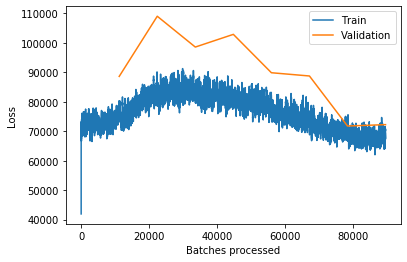

In [74]:
learn.recorder.plot_losses()

In [75]:
learn.export('fastai-999-balance-3.pkl')

In [76]:
# overfitting like crazy
# http://karpathy.github.io/2019/04/25/recipe/

In [77]:
data = TabularDataBunch.from_df(
    '../models', df, dep_var, valid_idx=df.index, procs=procs, 
    cat_names=cat_names, cont_names=cont_names
)

In [78]:
learn = tabular_learner(
    data, layers=[512, 256, 64], ps=[0.4, 0.4, 0.4], metrics=root_mean_squared_error
)

In [79]:
learn.fit_one_cycle(8, 0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,114059.117188,176220.578125,416.986053,06:38
1,126394.984375,202124.312500,446.919586,06:39
2,124900.734375,176549.609375,417.322479,06:39
3,117688.265625,173594.046875,414.310089,06:43
4,116799.804688,187246.906250,430.446808,06:41
5,109014.296875,167184.125000,406.531403,06:38
6,97946.875000,136050.531250,366.581757,06:42
7,81371.585938,108279.289062,322.689575,06:43


In [80]:
learn.fit_one_cycle(8, 0.1)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,110229.617188,257282.765625,426.231842,06:40
1,112242.484375,224045.953125,471.672791,06:37
2,119556.554688,195034.171875,439.412720,06:36
3,110989.656250,183863.406250,426.641693,06:40
4,110619.453125,140840.250000,373.311859,06:41
5,105518.937500,144013.968750,377.891022,06:37
6,88614.187500,119421.835938,343.759460,06:40
7,81263.125000,145707.453125,346.456421,06:45


In [81]:
learn.fit_one_cycle(8, 0.01)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,84390.000000,116531.312500,338.960327,06:41
1,91796.476562,118640.578125,342.855072,06:37
2,94016.367188,123262.054688,349.377502,06:35
3,90430.031250,126975.781250,354.706024,06:33
4,81992.531250,113702.304688,335.726807,06:33
5,79831.101562,107362.828125,325.873962,06:30
6,69578.890625,82649.875000,285.732086,06:31
7,71544.484375,78764.007812,278.951141,06:35


In [82]:
learn.fit_one_cycle(8, 0.001)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,65792.187500,73156.835938,268.689270,06:36
1,71117.789062,75447.382812,272.888611,06:35
2,69508.218750,77647.734375,276.865295,06:28
3,69683.210938,81697.726562,283.979462,06:31
4,65459.449219,77269.242188,276.207214,06:30
5,66458.031250,70501.531250,263.694855,06:35
6,66739.078125,77070.218750,275.925629,06:37
7,63641.351562,69919.773438,262.647644,06:35


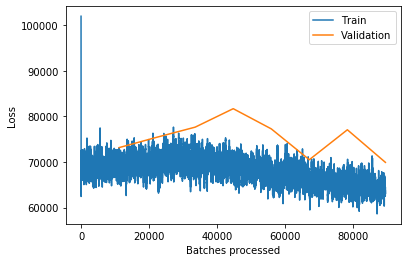

In [83]:
learn.recorder.plot_losses()

In [84]:
learn.export('fastai-999-balance-3-overfitting.pkl')